<a href="https://colab.research.google.com/github/danielopezr/COMPETENCIA_AI4ENG_UDEA_2025-2/blob/main/01%20-%20exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **01 - Exploración**

## **Importación de librerías**

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Carga del dataset**

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.37GB/s]


In [3]:
!unzip udea*.zip > /dev/null

In [4]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185238 test.csv
   692501  10666231 143732437 train.csv
  1286075  15528571 207634348 total


In [5]:
df = pd.read_csv("train.csv")
df.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


## **Información general del dataset**

In [6]:
print("="*60)
print("Resumen del Conjunto de Datos")
print("="*60)
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

Resumen del Conjunto de Datos
Número de filas: 692500
Número de columnas: 21


In [7]:
print("="*60)
print("Información del Conjunto de Datos")
print("="*60)
print(df.info())

Información del Conjunto de Datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO   

In [8]:
print("="*60)
print("Valores faltantes por columna")
print("="*60)
print(df.isnull().sum())

Valores faltantes por columna
ID                                 0
PERIODO_ACADEMICO                  0
E_PRGM_ACADEMICO                   0
E_PRGM_DEPARTAMENTO                0
E_VALORMATRICULAUNIVERSIDAD     6287
E_HORASSEMANATRABAJA           30857
F_ESTRATOVIVIENDA              32137
F_TIENEINTERNET                26629
F_EDUCACIONPADRE               23178
F_TIENELAVADORA                39773
F_TIENEAUTOMOVIL               43623
E_PRIVADO_LIBERTAD                 0
E_PAGOMATRICULAPROPIO           6498
F_TIENECOMPUTADOR              38103
F_TIENEINTERNET.1              26629
F_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                 0
INDICADOR_1                        0
INDICADOR_2                        0
INDICADOR_3                        0
INDICADOR_4                        0
dtype: int64


## **Exploración básica**

### Estudiantes por programa académico

In [9]:
program_counts_all = df["E_PRGM_ACADEMICO"].value_counts()

program_counts_all_df = program_counts_all.reset_index()
program_counts_all_df.columns = ["Programa Académico", "Número de Estudiantes"]

print("Número de estudiantes por programa académico:")
print(program_counts_all_df.to_string(index=False))

Número de estudiantes por programa académico:
                                                                                           Programa Académico  Número de Estudiantes
                                                                                                      DERECHO                  53244
                                                                                   ADMINISTRACION DE EMPRESAS                  51902
                                                                                           CONTADURIA PUBLICA                  39664
                                                                                                   PSICOLOGIA                  31932
                                                                                        INGENIERIA INDUSTRIAL                  28481
                                                                                   ADMINISTRACIÓN DE EMPRESAS                  24777
                       

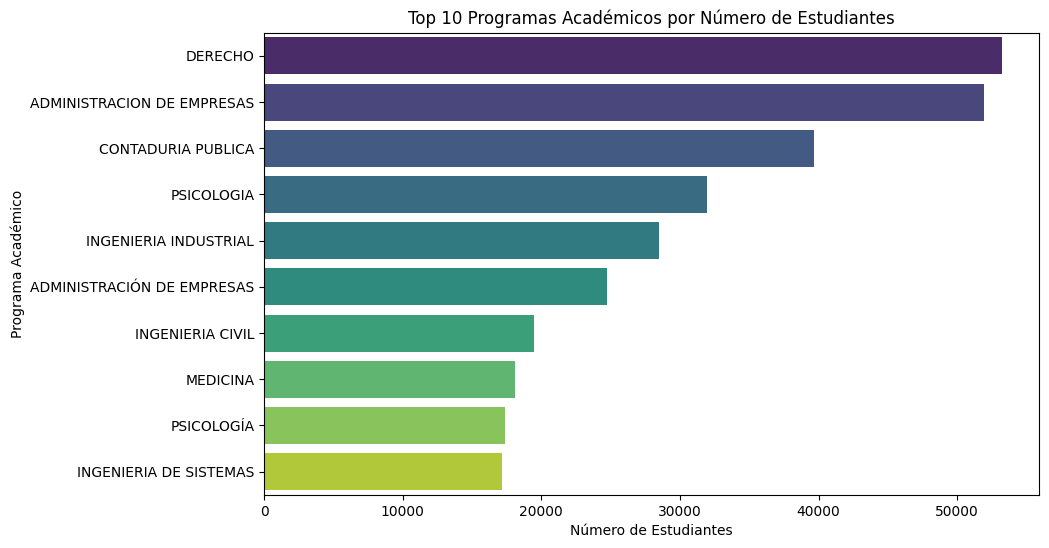

In [24]:
program_counts_top10 = program_counts_all.head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    y = program_counts_top10.index,
    x = program_counts_top10.values,
    hue = program_counts_top10.index,
    palette = "viridis"
)

plt.title("Top 10 Programas Académicos por Número de Estudiantes")
plt.xlabel("Número de Estudiantes")
plt.ylabel("Programa Académico")
plt.show()

### Estudiantes por departamento

In [11]:
dept_counts = df["E_PRGM_DEPARTAMENTO"].value_counts()

dept_counts_df = dept_counts.reset_index()
dept_counts_df.columns = ["Departamento", "Número de Estudiantes"]

print("Número de estudiantes por departamento:")
print(dept_counts_df.to_string(index=False))

Número de estudiantes por departamento:
   Departamento  Número de Estudiantes
         BOGOTÁ                 282159
      ANTIOQUIA                  83607
          VALLE                  44588
      ATLANTICO                  41020
      SANTANDER                  28828
NORTE SANTANDER                  22588
        BOLIVAR                  20629
         BOYACA                  14048
   CUNDINAMARCA                  14018
         NARIÑO                  13454
      RISARALDA                  12679
        CORDOBA                  12188
         TOLIMA                  11921
         CALDAS                  11640
          CAUCA                  11471
          HUILA                   9995
      MAGDALENA                   9512
          SUCRE                   8674
          CESAR                   8279
        QUINDIO                   8229
           META                   7910
     LA GUAJIRA                   4778
          CHOCO                   4289
        CAQUETA         

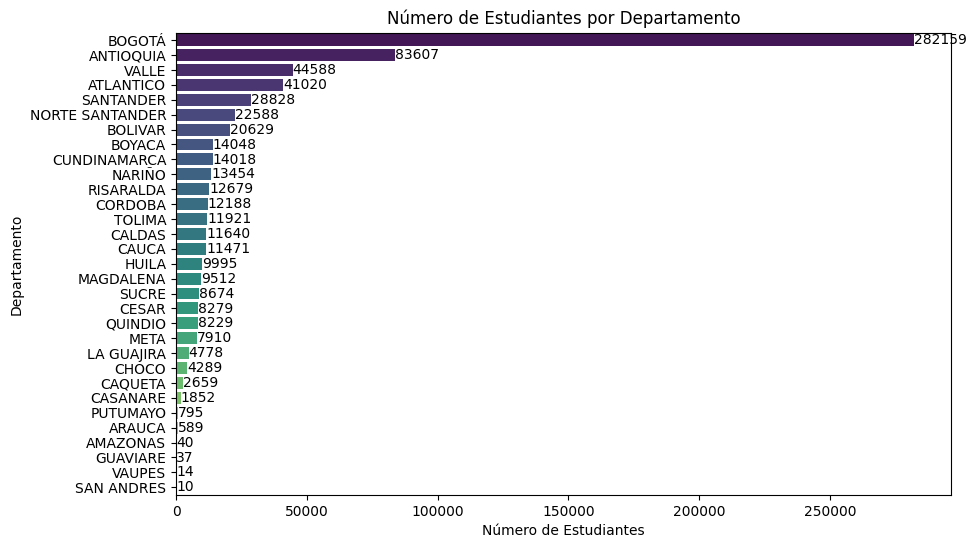

In [20]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
    y = dept_counts.index,
    x = dept_counts.values,
    hue = dept_counts.index,
    palette = "viridis"
)

for container in ax.containers:
    ax.bar_label(container, fmt="%d")

plt.title("Número de Estudiantes por Departamento")
plt.xlabel("Número de Estudiantes")
plt.ylabel("Departamento")
plt.show()

### Estudiantes por estrato socioeconómico

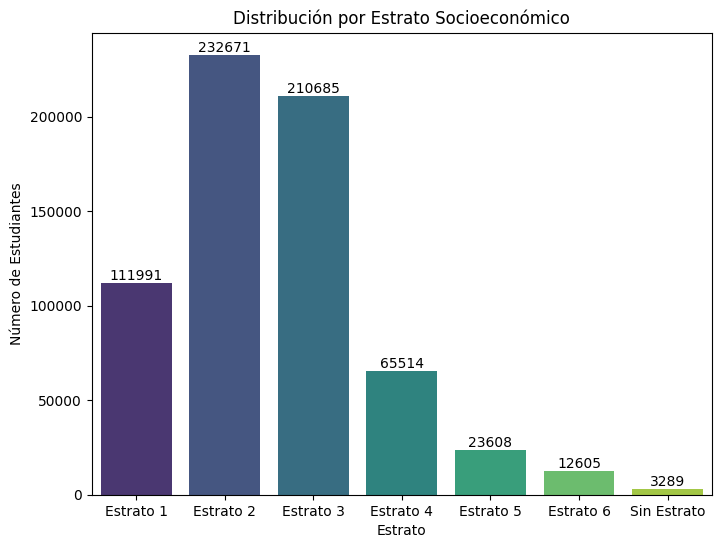

In [25]:
stratum_counts = df["F_ESTRATOVIVIENDA"].value_counts().sort_index()

plt.figure(figsize=(8,6))

ax = sns.barplot(
    x = stratum_counts.index,
    y = stratum_counts.values,
    hue = stratum_counts.index,
    palette = "viridis"
)

for container in ax.containers:
    ax.bar_label(container, fmt = "%d")

plt.title("Distribución por Estrato Socioeconómico")
plt.xlabel("Estrato")
plt.ylabel("Número de Estudiantes")
plt.show()

### Acceso de los estudiantes a recursos básicos

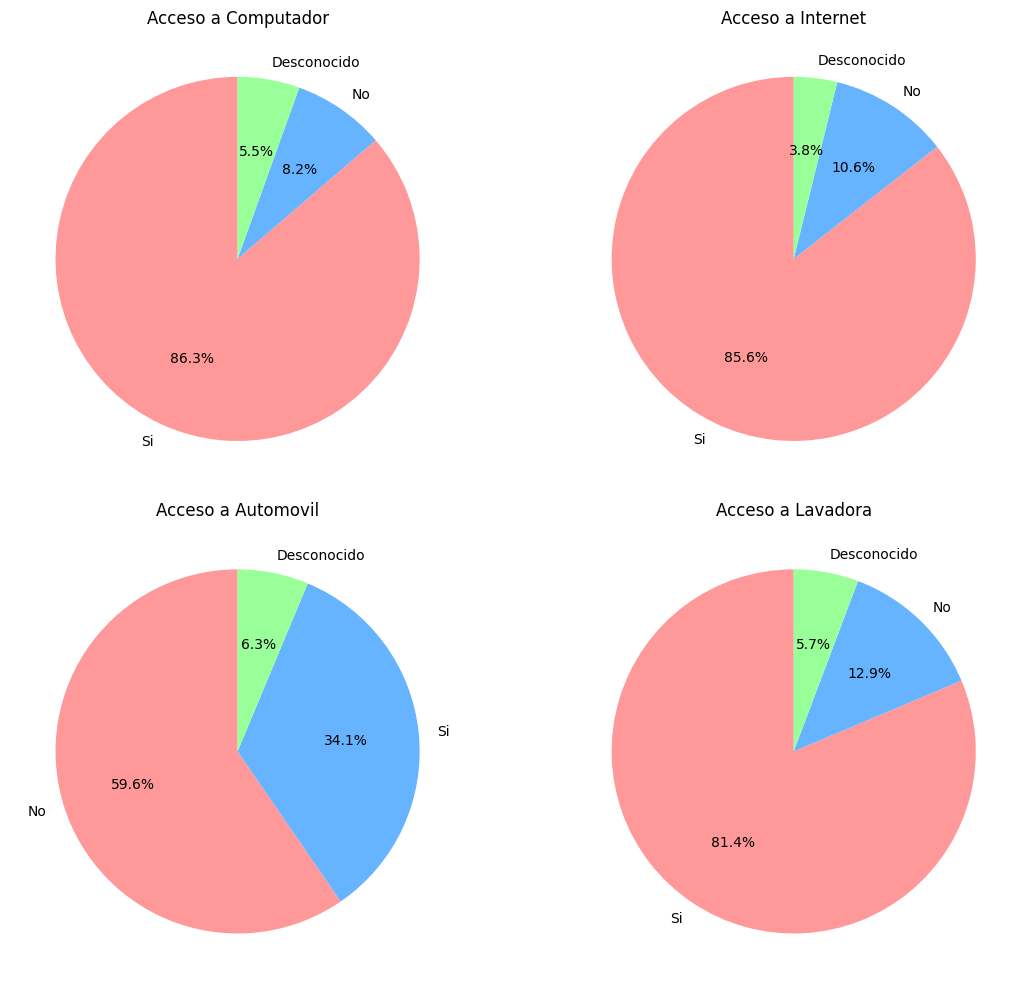

In [14]:
resources = ["F_TIENECOMPUTADOR", "F_TIENEINTERNET", "F_TIENEAUTOMOVIL", "F_TIENELAVADORA"]
titles = [r.replace("F_TIENE","").capitalize() for r in resources]

fig, axes = plt.subplots(2, 2, figsize = (12,10))
axes = axes.flatten()

for i, col in enumerate(resources):
    counts = df[col].value_counts(dropna=False)  # incluye NaN

    labels = []
    for val in counts.index:
        if pd.isna(val):
            labels.append("Desconocido")
        elif val == 1:
            labels.append("Sí")
        elif val == 0:
            labels.append("No")
        else:
            labels.append(str(val))

    axes[i].pie(counts, labels=labels, autopct="%1.1f%%", startangle=90, colors=["#ff9999","#66b3ff","#99ff99"])
    axes[i].set_title(f"Acceso a {titles[i]}")

plt.tight_layout()
plt.show()

### Distribución de indicadores

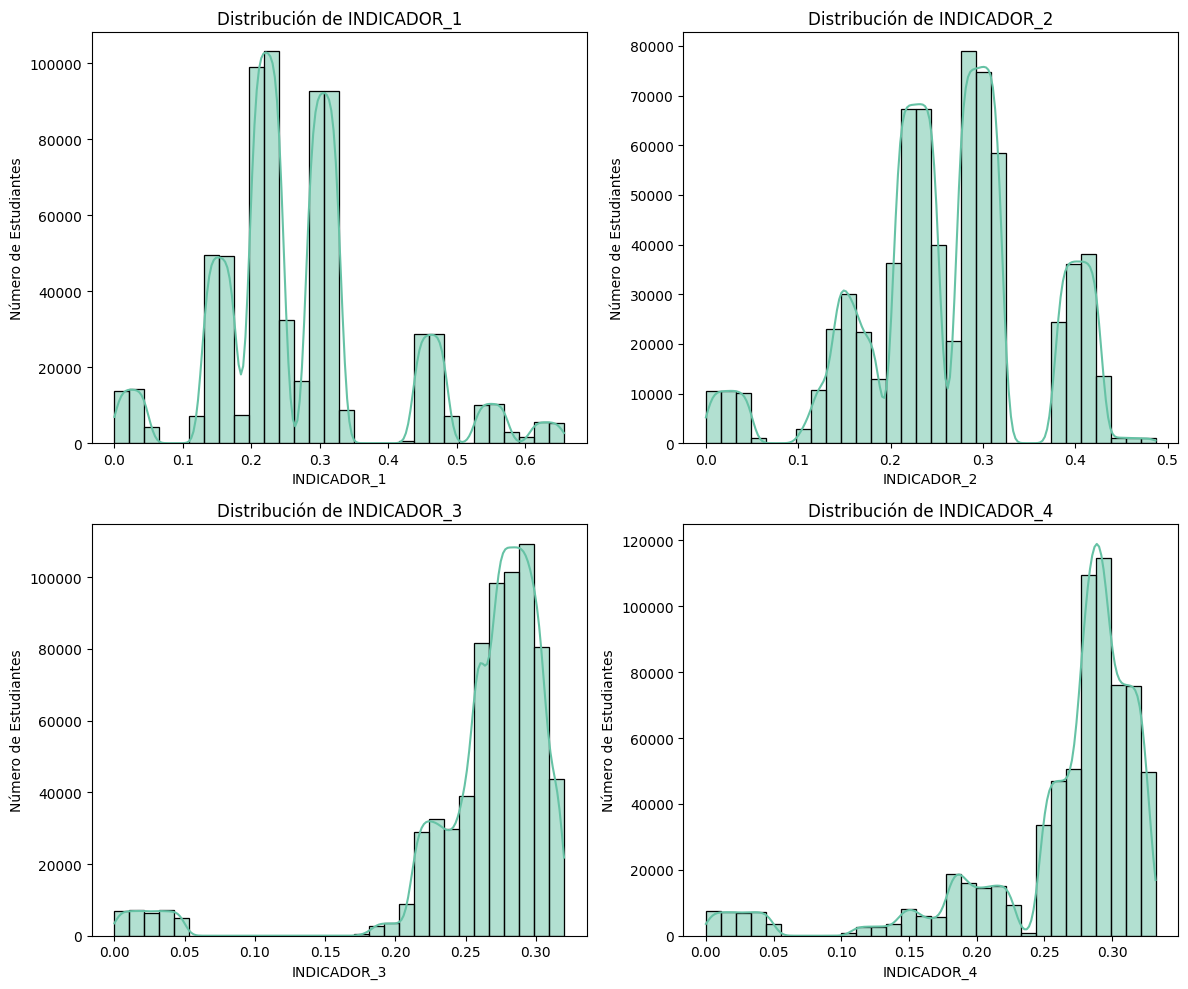

In [15]:
indicators = ["INDICADOR_1", "INDICADOR_2", "INDICADOR_3", "INDICADOR_4"]

fig, axes = plt.subplots(2, 2, figsize = (12,10))
axes = axes.flatten()

for i, col in enumerate(indicators):
    sns.histplot(df[col], bins = 30, kde = True, ax = axes[i], color = "#66c2a5")
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Número de Estudiantes")

plt.tight_layout()
plt.show()

### Distribución del rendimiento global

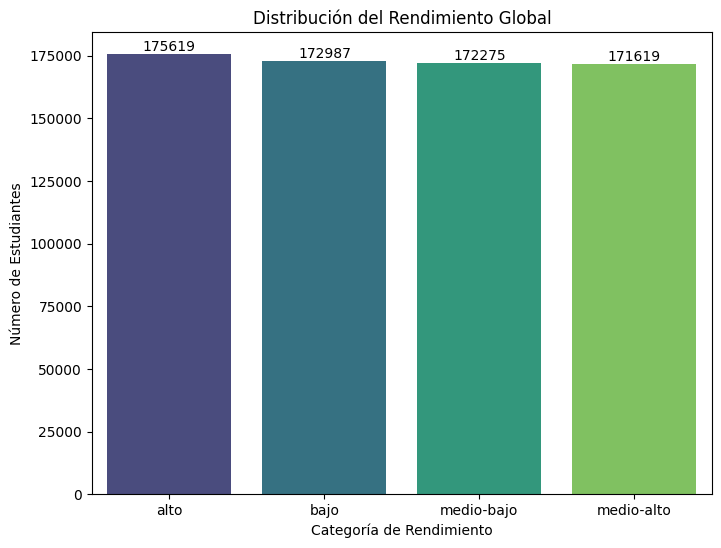

In [26]:
rend_counts = df['RENDIMIENTO_GLOBAL'].value_counts(dropna=False)

plt.figure(figsize=(8,6))

ax = sns.barplot(
    x = rend_counts.index,
    y = rend_counts.values,
    hue = rend_counts.index,
    palette = "viridis"
)

for container in ax.containers:
    ax.bar_label(container, fmt = "%d")

plt.title("Distribución del Rendimiento Global")
plt.xlabel("Categoría de Rendimiento")
plt.ylabel("Número de Estudiantes")
plt.show()